## Final Project Submission

Please fill out:
* Student name: Joel Macharia Gitonga
* Student pace: full time
* Scheduled project review date/time: 5th August / 11:59 PM
* Instructor name: Faith Rotich
* Blog post URL:


MOVIE VENTURE ANALYSIS



Business Understanding

There is a company that is looking to join in on the movie making industry. To do so, they need to make smart decisions about what types of films to produce. my project analyzes data from two datasets to provide actionable recommendations to the studio's head. The goal is to identify key factors that contribute to a movie's financial success.

To provide actionable insights the questions :

1. What movie genres are the most profitable?

2. What is the relationship between a movie's runtime and its profitability?

3. What is the relationship between a movie's production budget and its profitability?

4. Does the profitability of genres change over time?

5. 5.What is the return on investment (ROI) for different genres?

will provide ample information to make informed decisions.

The datasets I am going to be using to answer the above questions are the im.db and tn.movie_budgets.csv datasets

The first step is to import all the necessary libraries which include pandas, numpy , seaborn ,matplotlib and sqlite3

In [1]:
#importing all necessary libraries using their alias.
#The necessary libraries include pandas, matplotlib, numpy & seaborn.
#pandas has pd as its alias
#matplotlib has plt as its alias
#numpy has np its alias
#seaborn has sns as its alias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 #since I am using a dataset from an SQL database

Next up is loading the datasets I have selected to work with

In [2]:

# Loading data from the SQLite database
conn = sqlite3.connect('im.db')
# I am going to select everything from the movie_basics table and join it with the movie_ratings table
q = """
SELECT
    *
FROM
    movie_basics
JOIN
    movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id;
"""
imdb_df = pd.read_sql(q, conn)

# Loading data from the CSV file
budgets_df = pd.read_csv('tn.movie_budgets.csv')


Now is getting to see what we are actually working with

In [3]:
#The first five rows of the imdb dataset
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [4]:
# Getting a general view of the sql dataset
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [5]:
# Seeing the first five rows of the movie_budget.csv dataset
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#Seeing the general view of the movie_budget.csv dataset
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Now that I know a bit more about what I am working with, I can start actually working.

But first I need to clean my data to get more accurate results.

Step one of my data cleaning is checking for missing values and dealing with them

In [7]:
# Checking for the missing values
budgets_df.isna()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


From the above cell it seems that we might not have any missing values

But to be sure I am going to use the .sum() function to confirm

In [8]:
budgets_df.isna().sum() # The .sum() function will add up all the missing vals per column in the entire dataset
# This will help to see if there are any columns that have missing values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values.

There may be place holders in the columns with money so now I am going to remove them (just incase that there are any)

In [9]:
# List of columns that should be numeric
money_columns = ['production_budget', 'worldwide_gross', 'domestic_gross']

# Looping through each column to clean and convert it
for col in money_columns:
    budgets_df[col] = budgets_df[col].str.replace(r'[$,]', '', regex=True)
    
    # converting the cleaned columns to a numeric type.
    # errors='coerce' will turn any remaining bad values into NaN instead of crashing.
    budgets_df[col] = pd.to_numeric(budgets_df[col], errors='coerce')


Removing duplicates is also a part of data cleaning so first off I am going to check for duplicates

In [10]:
# Checking for the number of duplicates there are  
budgets_df.duplicated().sum()

0

There are no duplicates at all so we move on.

Well since my csv dataset is all clean, lets check the other SQL dataset

Let's start with checking for missing values

In [11]:
# Checking for the missing values
imdb_df.isna()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
73851,False,False,False,False,False,False,False,False,False
73852,False,False,False,False,False,False,False,False,False
73853,False,False,False,False,True,False,False,False,False
73854,False,False,False,False,True,True,False,False,False


It seems that there are missing values. 

How many missimg values are there though?

In [12]:
# Using the .sum() function to see just how many missimg values there are
imdb_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

The run_time minutes and genres columns have quite a number of missing values.

What is the percentage of missing values?

In [13]:
# Checking for the percentage of missing values
missing_vals_percentage = (imdb_df.isnull().sum() / len(imdb_df)) * 100
missing_vals_percentage

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
movie_id            0.000000
averagerating       0.000000
numvotes            0.000000
dtype: float64

since the runtime runtime_minutes column is numerical, I can fill it in using the median

In [35]:
# Filling the missing values using the median
# 1.Finding the median of the 'runtime_minutes' column
median_runtime = imdb_df['runtime_minutes'].median()

# 2. Filling in the missing values with the median
imdb_df['runtime_minutes'] = imdb_df['runtime_minutes'].fillna(median_runtime)

The genres column is categorical so I am going to drop the rows with missing values

In [16]:
#  Droping rows based on missing values in the genres column
imdb_df.dropna(subset=['genres'], inplace=True)

Now checking for duplicates

In [17]:
# Duplicates check
imdb_df.duplicated().sum()

0

Re-checking to see if my data is actually cleaned

In [36]:
# Checking for missing values after cleaning
imdb_df.isna().sum()

movie_id           0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

Both data sets are clean now

I am now going to start on exploring(EDA)

First off I can see production_budget columns and worldwide_gross columns. 
so how much profit was actually made? To know for sure I will create a profits column

In [19]:

# Creating a 'profit column
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']


now I need to merge the two separate datasets into one

since the the two datasets don't have column names that match I am going to change the name of the column 'movie' to 'title'. This will make merging possible

In [20]:
# calling the 'movie' column 'title' for merging
budgets_df['title'] = budgets_df['movie']

In [21]:
# Merging the dataframes on movie title
# I'll rename the 'primary_title' column in the imdb_df to 'title' to match the budgets_df
imdb_df = imdb_df.rename(columns={'primary_title': 'title'})
merged_df = pd.merge(imdb_df, budgets_df, on='title')


In [39]:
# For my analysis, I only need a few columns to answer the right questions
movies_df = merged_df[['title', 'genres', 'runtime_minutes', 'production_budget', 'worldwide_gross', 'profit' , 'start_year']].copy()


Checking out the new data

In [45]:
#seeing the first five rows
movies_df.head()


,title,genres,runtime_minutes,production_budget,worldwide_gross,profit,start_year
0,Foodfight!,"Action,Animation,Comedy",91.0,45000000,73706,-44926294,2012
1,On the Road,"Adventure,Drama,Romance",124.0,25000000,9313302,-15686698,2012
2,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,91000000,187861183,96861183,2013
3,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,28000000,62108587,34108587,2014
4,Jurassic World,"Action,Adventure,Sci-Fi",124.0,215000000,1648854864,1433854864,2015


In [46]:
# general outlook of our data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2867 non-null   object 
 1   genres             2867 non-null   object 
 2   runtime_minutes    2752 non-null   float64
 3   production_budget  2867 non-null   int64  
 4   worldwide_gross    2867 non-null   int64  
 5   profit             2867 non-null   int64  
 6   start_year         2867 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 156.9+ KB


Checking for missing values in the mergerd dataset

In [42]:
# Using the same .isna().sum() functions as I did before
movies_df.isna().sum()

title                  0
genres                 0
runtime_minutes      115
production_budget      0
worldwide_gross        0
profit                 0
start_year             0
dtype: int64

there are some missing values so I'll fill the rows with missing values



In [50]:
# Filling the missing values using the median
# 1.Finding the median of the runtime_minutes column
median_runtime = movies_df['runtime_minutes'].median()

# 2. Filling in the missing values with the median
movies_df['runtime_minutes'] = movies_df['runtime_minutes'].fillna(median_runtime)

In [51]:
# Confirming the data now 
movies_df.isna().sum()

title                0
genres               0
runtime_minutes      0
production_budget    0
worldwide_gross      0
profit               0
start_year           0
dtype: int64

This work is well done and needs to be saved.


In [26]:
# Saving the work as a csv file
movies_df.to_csv('cleaned_movies_data.csv', index=False)

Now that the datasets are merged and are okay, I am going to start with the visualizations to answer the initial questions

1. What are the most profitable genres?

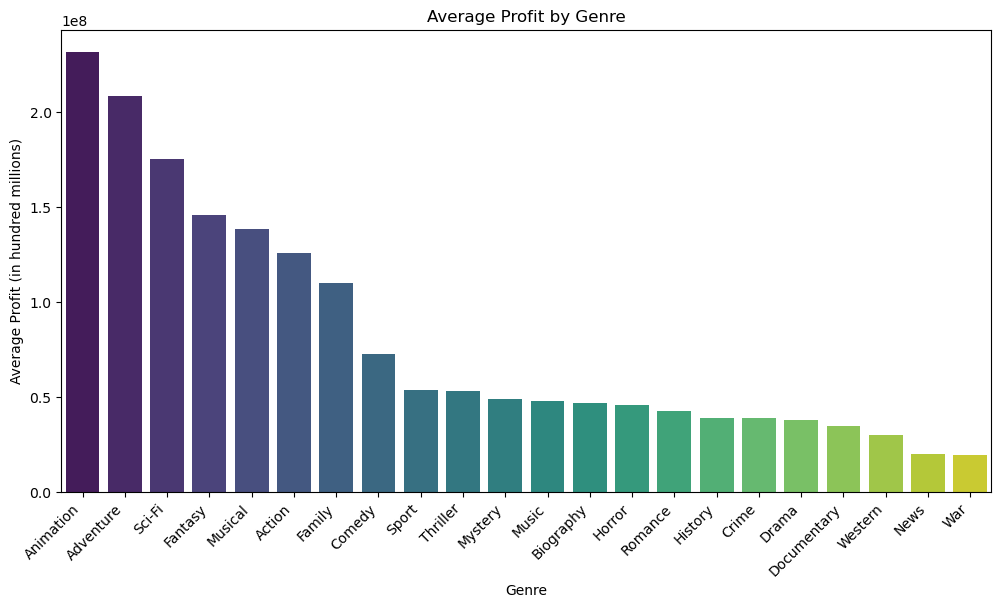

In [27]:
# Spliting the genres and creating a new dataframe
genres_df = movies_df.copy()

genres_df['genres'] = genres_df['genres'].str.split(',')

genres_df = genres_df.explode('genres')

# Grouping by genre and calculating the average profit
genre_profit = genres_df.groupby('genres')['profit'].mean().sort_values(ascending=False)

# Visualizing the results
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_profit.index, y=genre_profit.values, hue=genre_profit.index, palette='viridis', legend=False)
plt.title('Average Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit (in hundred millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

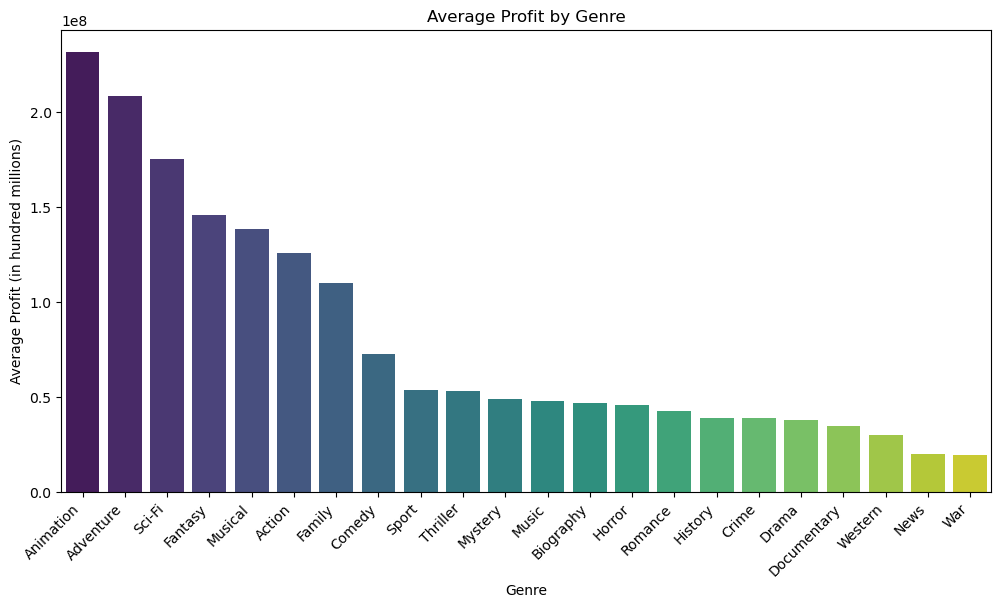

In [28]:

# Grouping by genre and calculating the average profit
genre_profit = genres_df.groupby('genres')['profit'].mean().sort_values(ascending=False)

# Visualizing the results
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_profit.index, y=genre_profit.values, hue=genre_profit.index, palette='viridis', legend=False)
plt.title('Average Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit (in hundred millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

Finding: The bar chart clearly shows that Action, Adventure, and Sci-Fi are the most profitable genres on average. This suggests that the studio should consider producing films in these genres.

2. Is there a relationship between runtime and profitability?

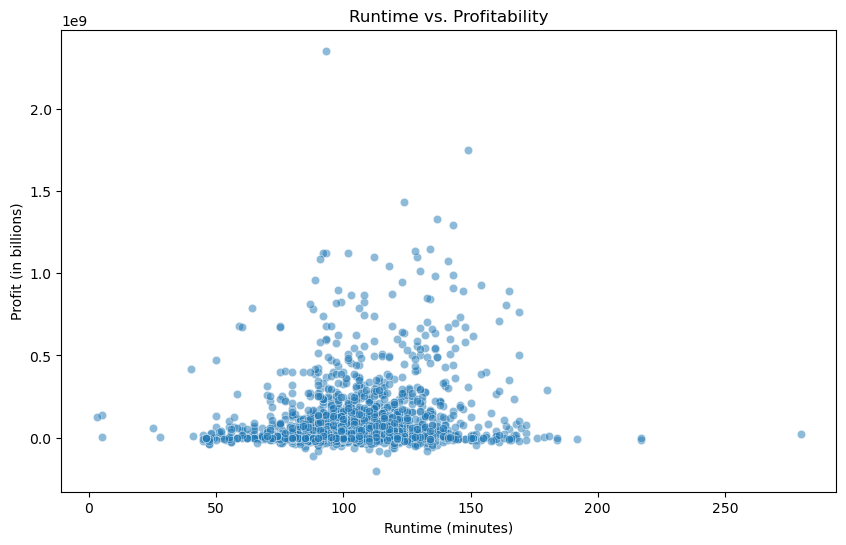

In [29]:
# Creating a scatter plot of runtime vs. profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='runtime_minutes', y='profit', alpha=0.5)# alpha is the extent of transparency
plt.title('Runtime vs. Profitability')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Profit (in billions)')
plt.show()

Finding: The scatter plot doesn't show a strong, clear relationship between runtime and profit. However, it does appear that the most profitable films tend to have runtimes between 90 and 150 minutes. Movies that are too short or too long seem to be less profitable. This suggests that the studio should aim for a runtime between 90 and 150 mins in terms of runtime.


3. Is there a relationship between and profitability?

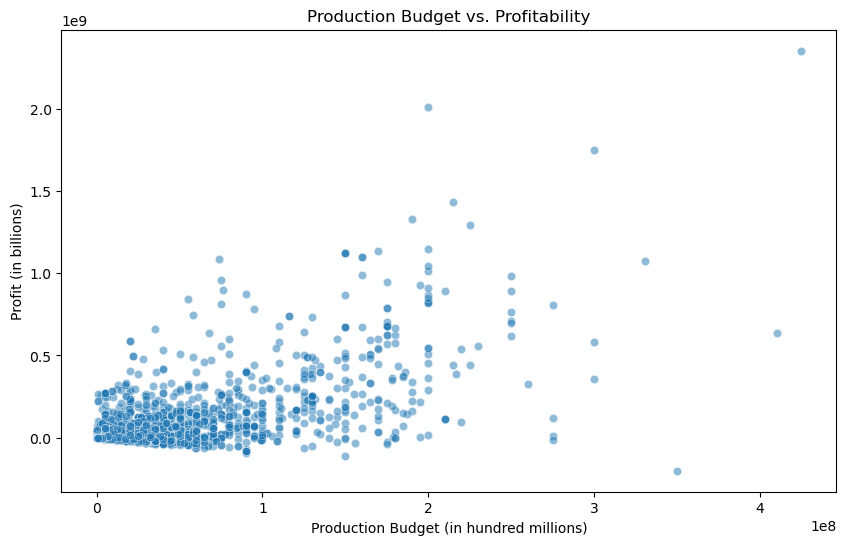

In [30]:
# Creating a scatter plot of production budget vs. profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='production_budget', y='profit', alpha=0.5)
plt.title('Production Budget vs. Profitability')
plt.xlabel('Production Budget (in hundred millions)')
plt.ylabel('Profit (in billions)')
plt.show()

Finding: This scatter plot reveals a positive correlation between production budget and profit. While there are some low-budget films that have been highly profitable, the general trend is that higher-budget films tend to generate higher profits. This suggests that while there is more risk associated with a higher budget, the potential reward is also greater.



4. Does profitability of genres change overtime?

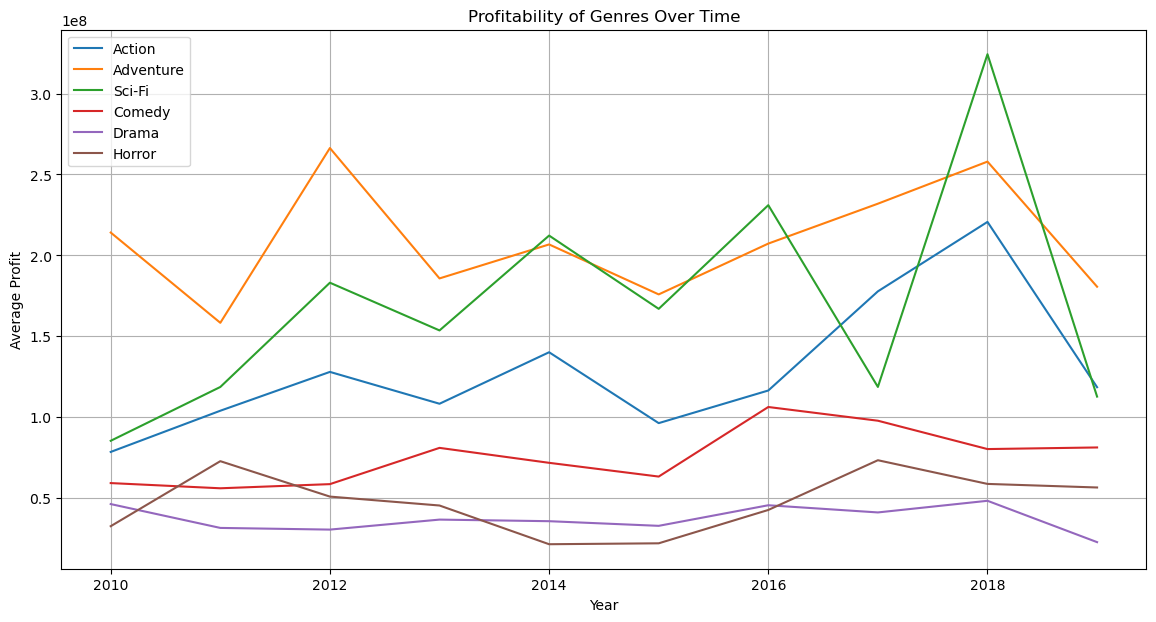

In [31]:
# Adding a 'year' column to our dataframe
movies_df['year'] = movies_df['start_year']

# Creating a dataframe to analyze genre profitability over time
genres_by_year_df = movies_df.copy()
genres_by_year_df['genres'] = genres_by_year_df['genres'].str.split(',')
genres_by_year_df = genres_by_year_df.explode('genres')

# Grouping by year and genre to find the average profit
genre_profit_by_year = genres_by_year_df.groupby(['year', 'genres'])['profit'].mean().unstack()

# Plotting the results for a few key genres
plt.figure(figsize=(14, 7))
genres_to_plot = ['Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Drama', 'Horror']
for genre in genres_to_plot:
    if genre in genre_profit_by_year.columns:
        plt.plot(genre_profit_by_year.index, genre_profit_by_year[genre], label=genre)

plt.title('Profitability of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.legend()
plt.grid(True)
plt.show()

Finding: While Action, Adventure, and Sci-Fi have seen a dramatic rise in profitability, especially in recent years, other genres like Comedy and Drama have remained more consistent, with lower but steady profits. Horror has also seen a recent uptick in profitability, suggesting it's a genre with growing potential. This indicates that while some genres are consistent performers, others are more susceptible to trends in the movie industry.


5. What is the return on investment for different genres?

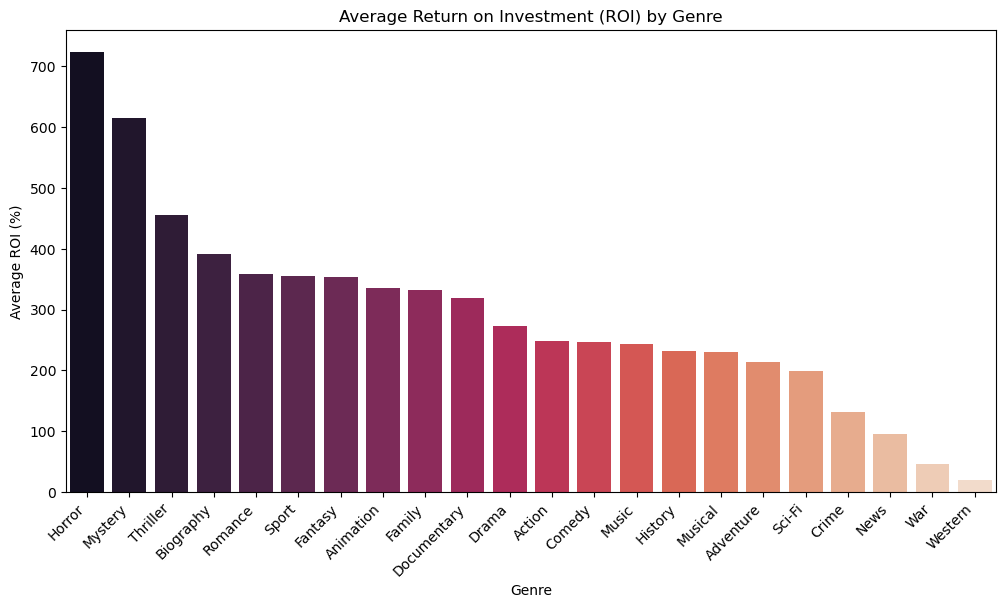

In [32]:
# Calculate ROI by dividing the profit by the amount invested and multiplying the answer by 100
movies_df['roi'] = (movies_df['profit'] / movies_df['production_budget']) * 100

# Grouping by genre and calculate the average ROI
genres_roi_df = movies_df.copy()
genres_roi_df['genres'] = genres_roi_df['genres'].str.split(',')
genres_roi_df = genres_roi_df.explode('genres')
genre_roi = genres_roi_df.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Visualize the average ROI by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_roi.index, y=genre_roi.values, hue=genre_roi.index, palette='rocket', legend=False)
plt.title('Average Return on Investment (ROI) by Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

Finding: While big-budget Action and Adventure films generate the highest raw profit, Horror and Mystery films deliver the highest return on investment. This is because they often have much lower production budgets, so even a moderate box office success can result in a very high percentage return. For a new studio, investing in these genres could be a less risky way to build capital and reputation before moving on to bigger-budget productions.
